<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/04_coffee_store_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [ ]:
# 한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [ ]:
# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

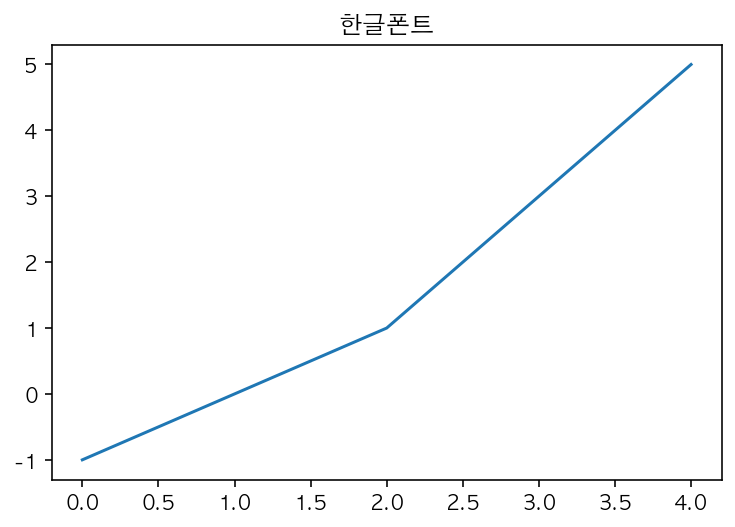

In [ ]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기


In [ ]:

df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.shape

(573680, 39)

### 데이터 미리보기

In [ ]:
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19905471  와라와라호프  NaN         Q       음식       Q09     유흥주점    Q09A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    호프/맥주   I56219  ...  1168010600106040000014378  대치상가   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  

[1 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

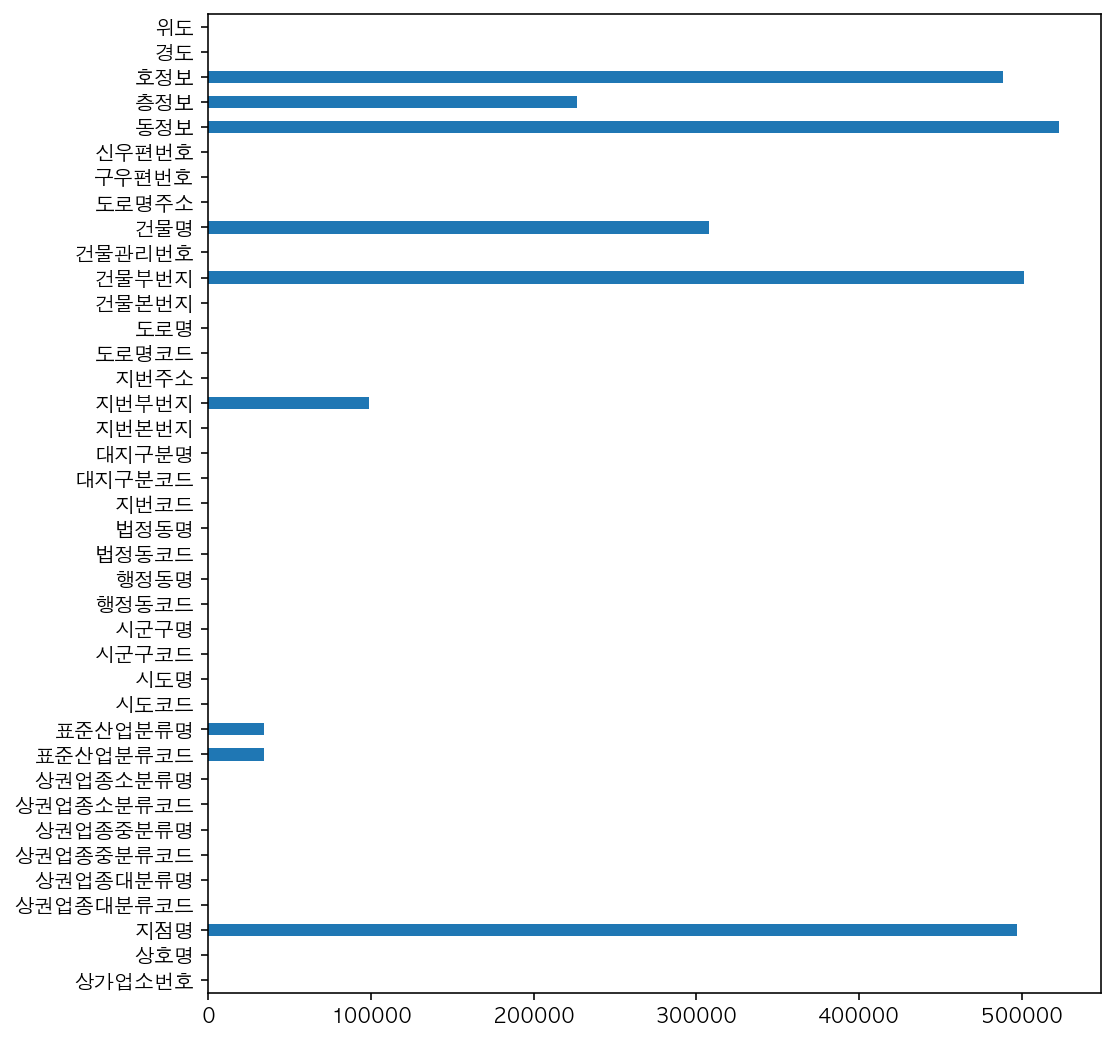

In [ ]:
df.isnull().sum().plot.barh(figsize=(8, 9))

### 사용하지 않는 컬럼 제거하기

In [ ]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(573680, 11)

In [ ]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기

### 서울만 따로 보기

In [ ]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기
* 상호명에서 브랜드명 추출

In [ ]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [ ]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

(543,)

In [ ]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"].shape

(506,)

In [ ]:
df_cafe = df_seoul[
    df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [ ]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

상호명_소문자  브랜드명
1104       스타벅스  스타벅스
1675      이디야커피   이디야
2023  스타벅스종로3가점  스타벅스
2770       스타벅스  스타벅스
2957      이디야커피   이디야

In [ ]:
df_cafe[["상호명", "브랜드명"]].tail()

상호명  브랜드명
567090   스타벅스  스타벅스
567828   스타벅스  스타벅스
568636  이디야커피   이디야
570096   스타벅스  스타벅스
571052   스타벅스  스타벅스

### 시각화
#### 분류별 countplot 그리기

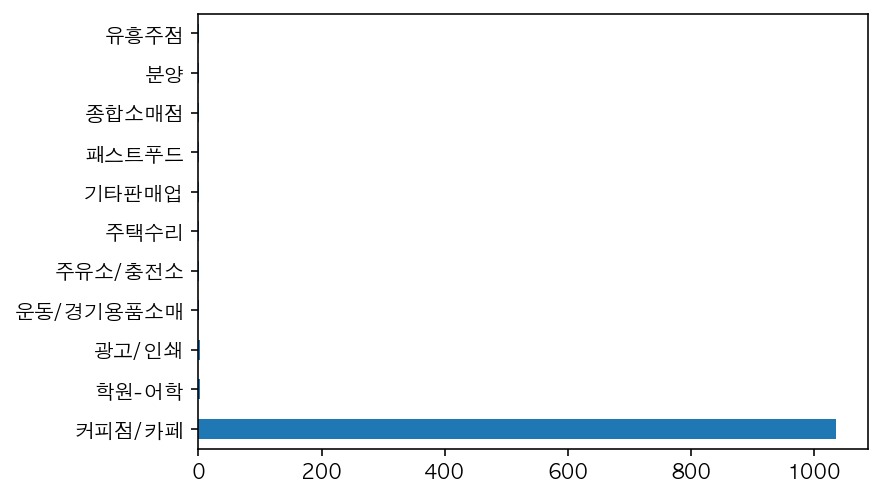

In [ ]:
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [ ]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [ ]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

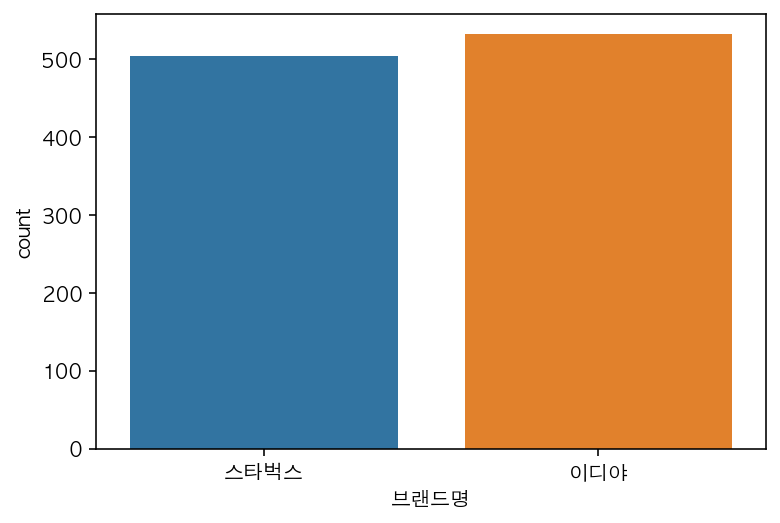

In [ ]:
sns.countplot(data=df_cafe, x="브랜드명")

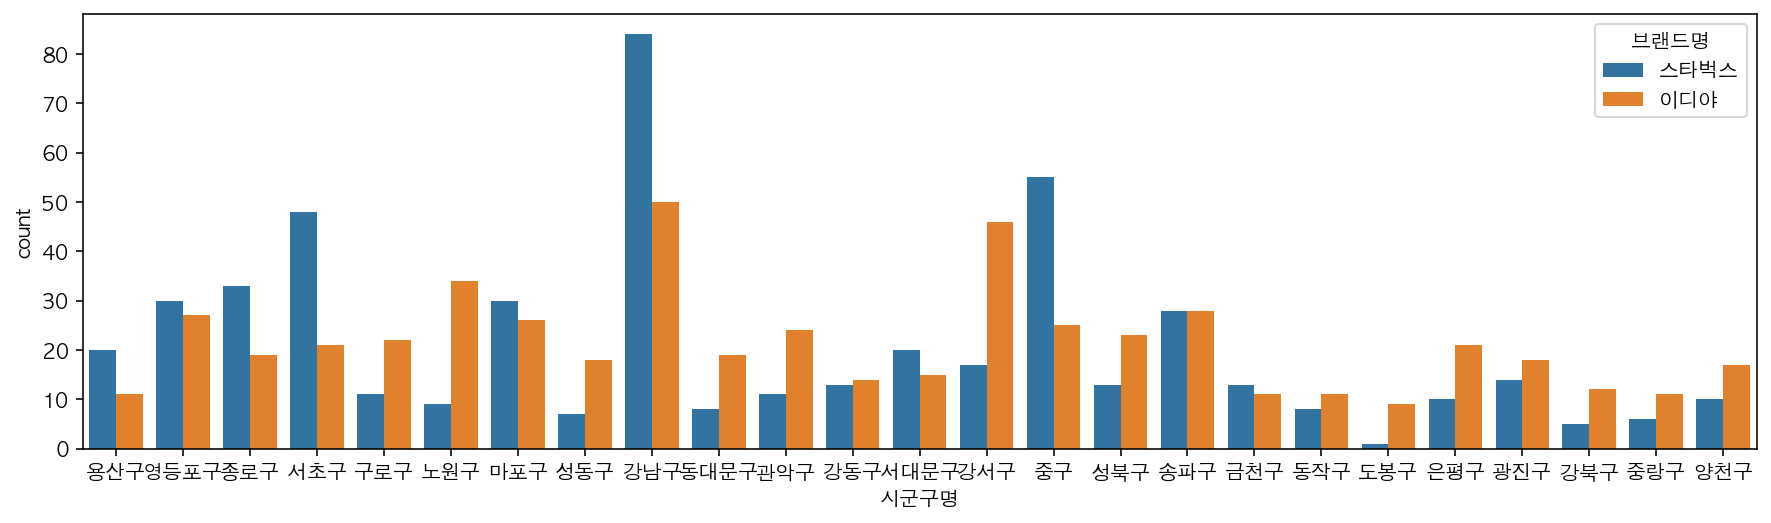

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

#### scatterplot 그리기
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

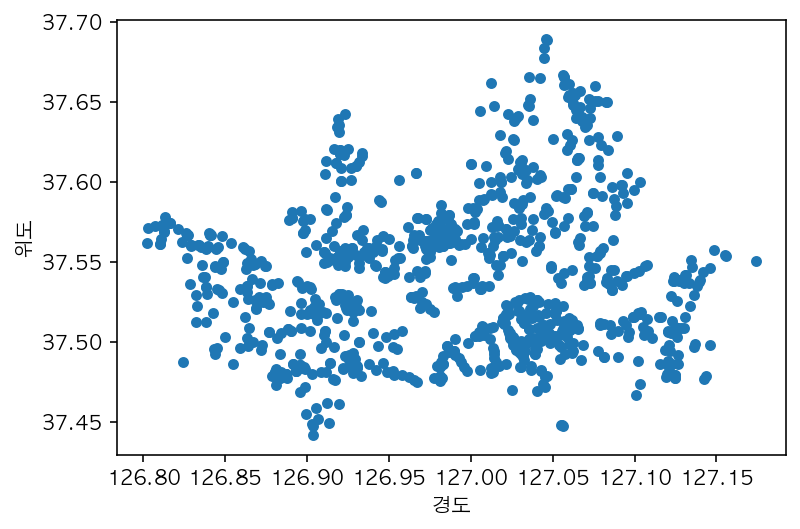

In [ ]:
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

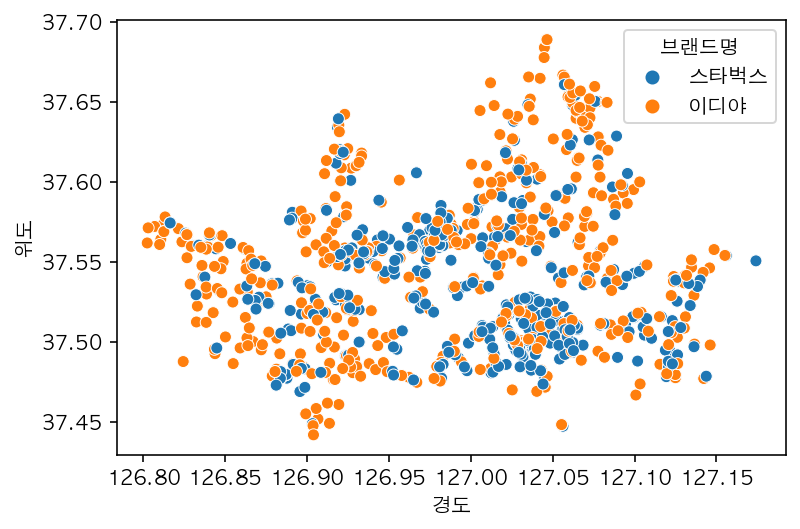

In [ ]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### jointplot 그리기

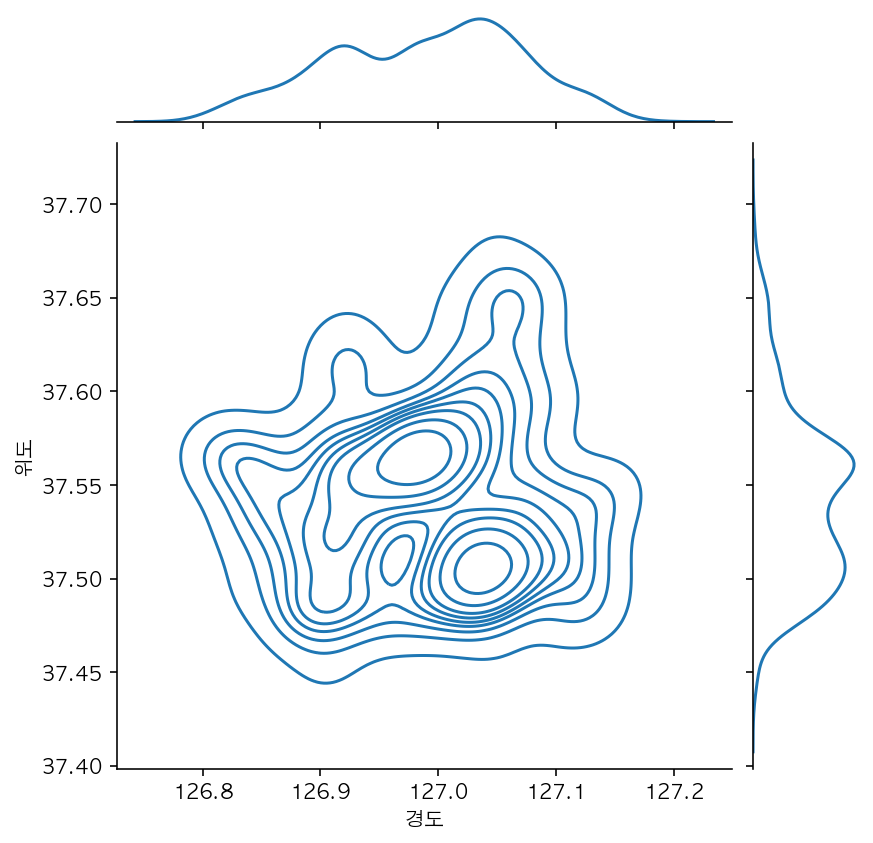

In [ ]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

## 구별 브랜드별 점포수
### groupby 와 pivot_table 로 구별 스타벅스, 이디야 매장 수 구하기
#### groupby 로 구별 매장수 구하기

In [ ]:
# 구별로 브랜드별 점포수를 구함
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용

df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [ ]:
df_cafe_vs.to_frame().head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [ ]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

시군구명  브랜드명  상호명
0  강남구  스타벅스   84
1  강남구   이디야   50
2  강동구  스타벅스   13
3  강동구   이디야   14
4  강북구  스타벅스    5

In [ ]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   50
2  강동구  스타벅스   13
3  강동구   이디야   14
4  강북구  스타벅스    5

#### pivot_table 로 구별 매장수 구하기

In [ ]:
pivot = pd.pivot_table(data=df_cafe, 
               index=["시군구명", "브랜드명"], 
               values="상호명", aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [ ]:
# 특정 구 데이터만 가져와서 보기
pivot.loc["강남구"]

상호명
브랜드명     
스타벅스   84
이디야    50

### 막대그래프로 시각화 하기

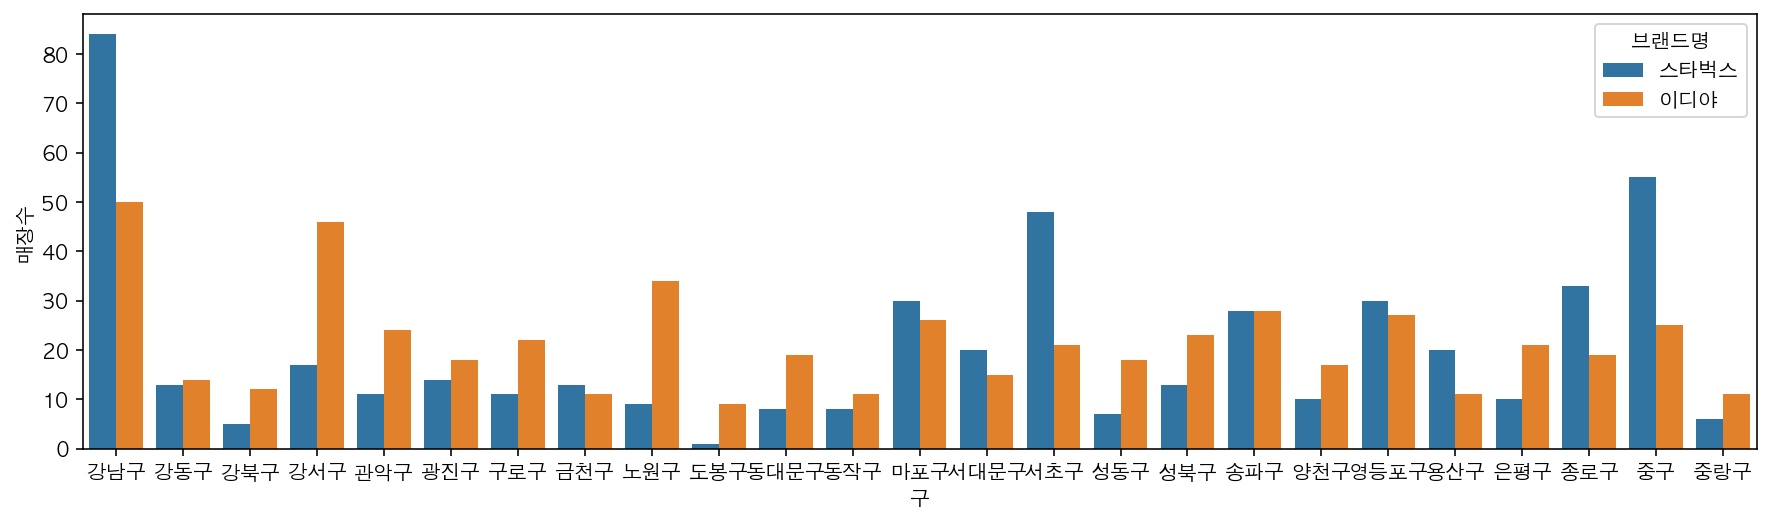

In [ ]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

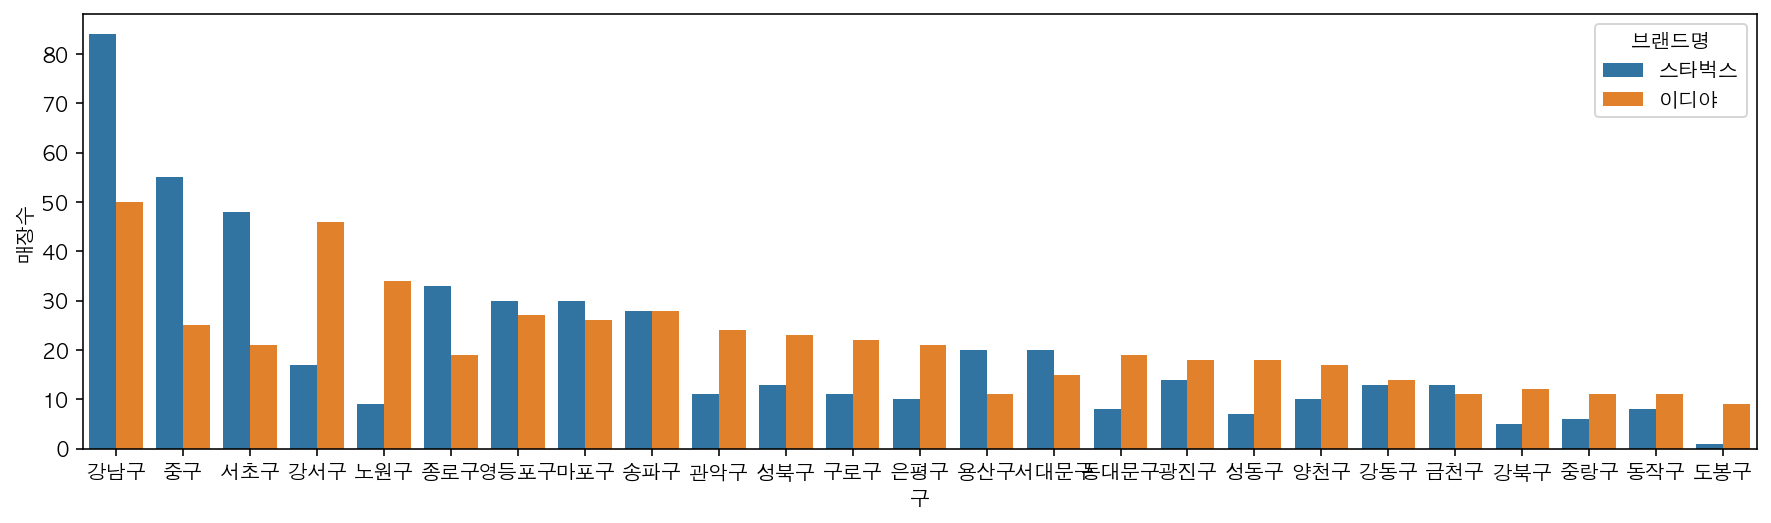

In [ ]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 
# barplot 정렬하기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values("매장수", ascending=False), x="구", y="매장수", hue="브랜드명")

* 브랜드명을 컬럼으로 만들기
* unstack 이해하기 : https://pandas.pydata.org/docs/user_guide/reshaping.html

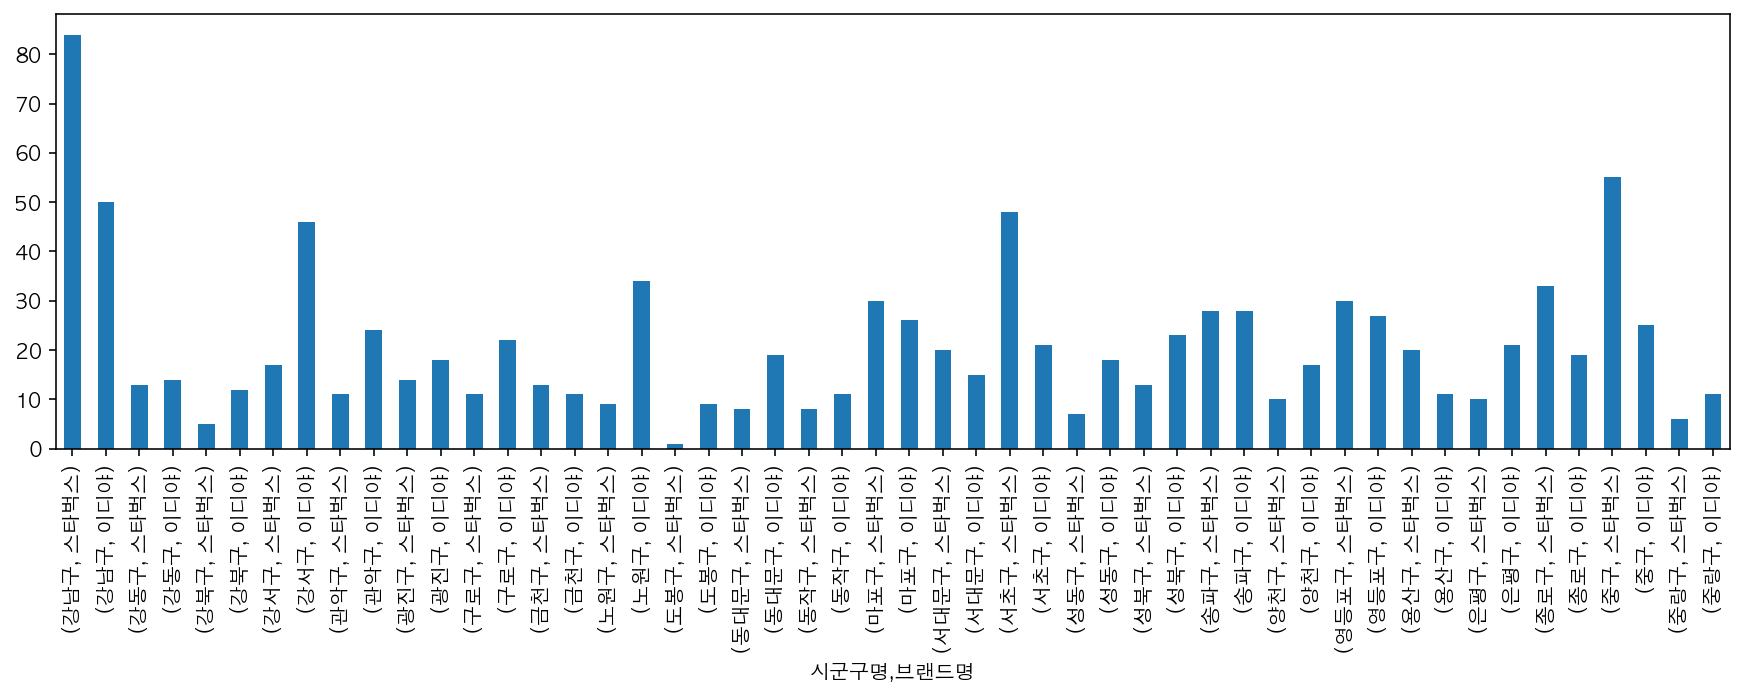

In [ ]:
# groupby 를 통해 "시군구명", "브랜드명"으로 그룹화를 하고 "상호명"의 갯수를 세어봄
group = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15, 4))

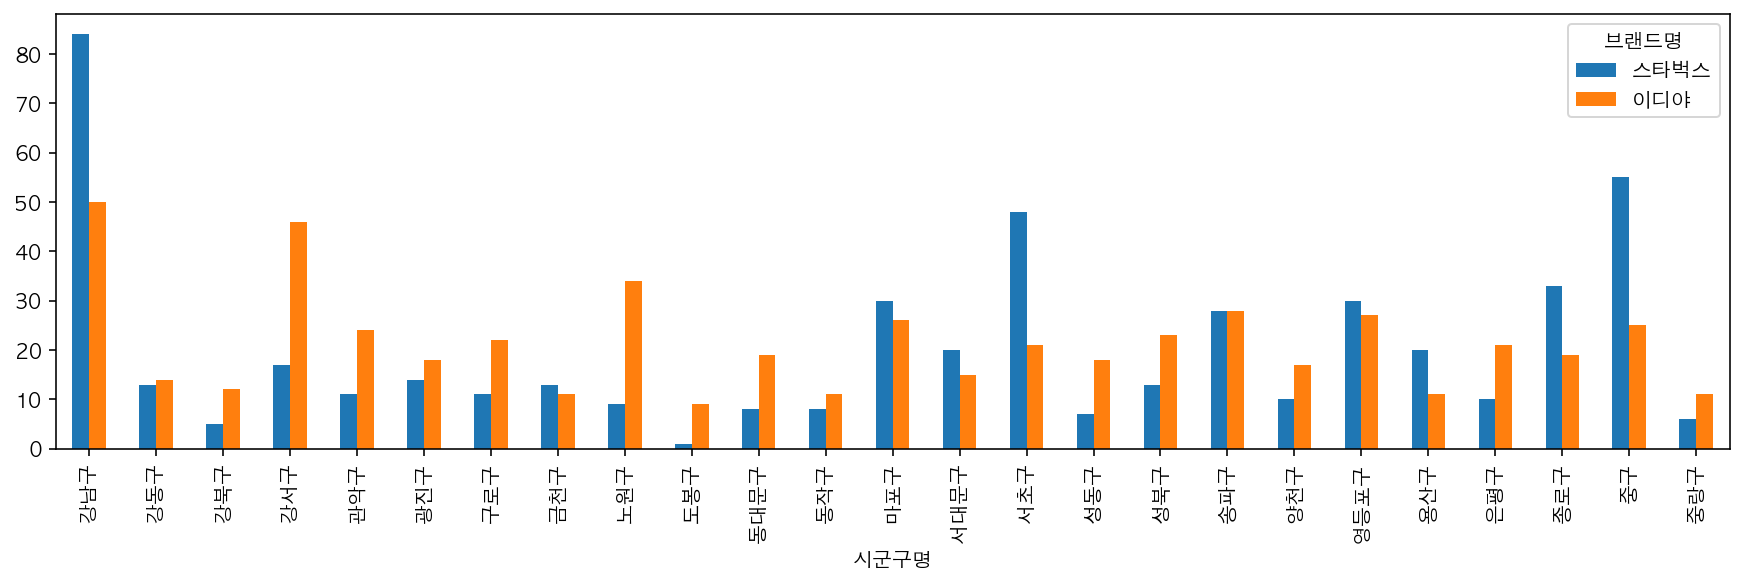

In [ ]:
# 위에서 groupby 로 데이터를 집계한 결과를 시각화
group.unstack().plot.bar(figsize=(15, 4))

In [ ]:
# pivot_table 을 이용해서 구별 스타벅스, 이디야 매장수를 구함
pivot = pd.pivot_table(data=df_cafe, index="시군구명", 
               columns="브랜드명", 
               values="상호명", aggfunc="count")

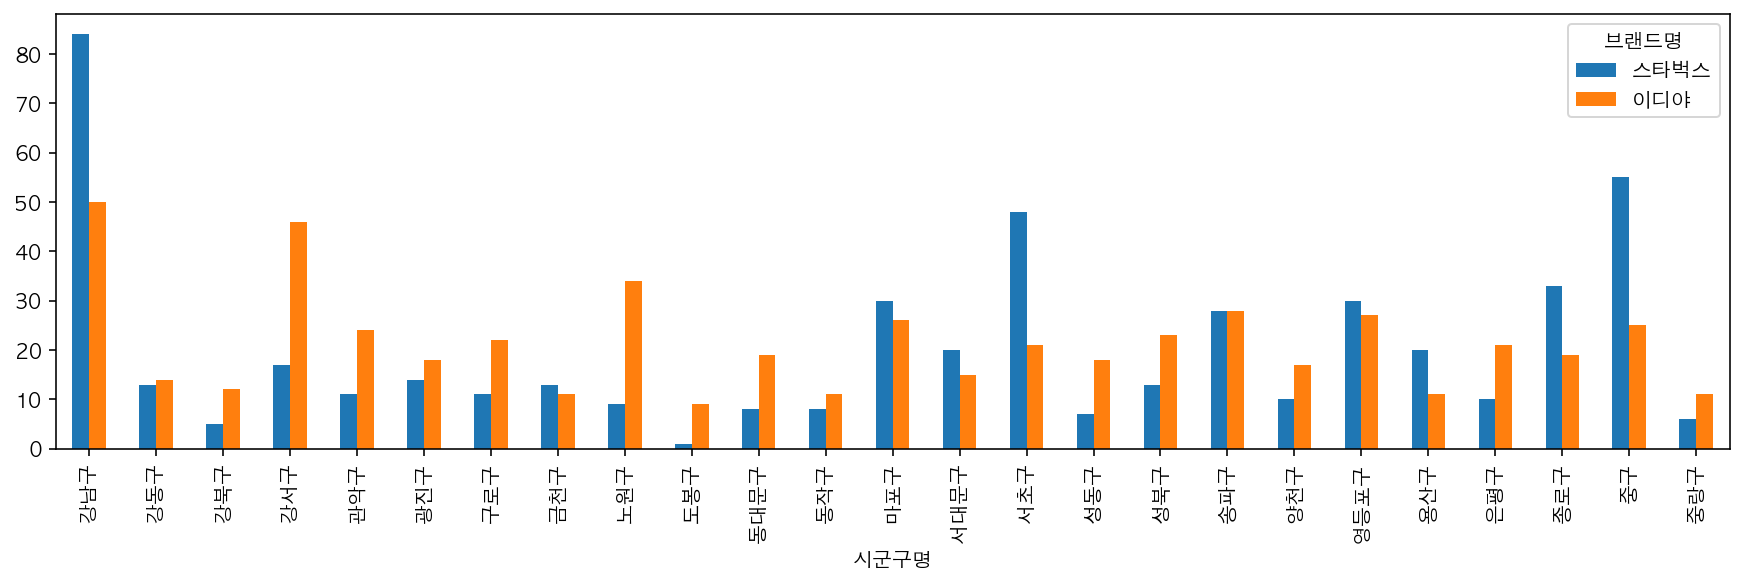

In [ ]:
# pivot_table 로 구한 결과를 plot.bar()를 통해 시각화
pivot.plot.bar(figsize=(15, 4))

In [ ]:
# 시군구명의 unique 값만 가져와서 리스트로 만듦
gu_name_list = df_cafe["시군구명"].unique().tolist()
# 시군구명을 정렬
gu_name_list.sort()
# 슬라이싱을 통해 5개만 미리보기
gu_name_list[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

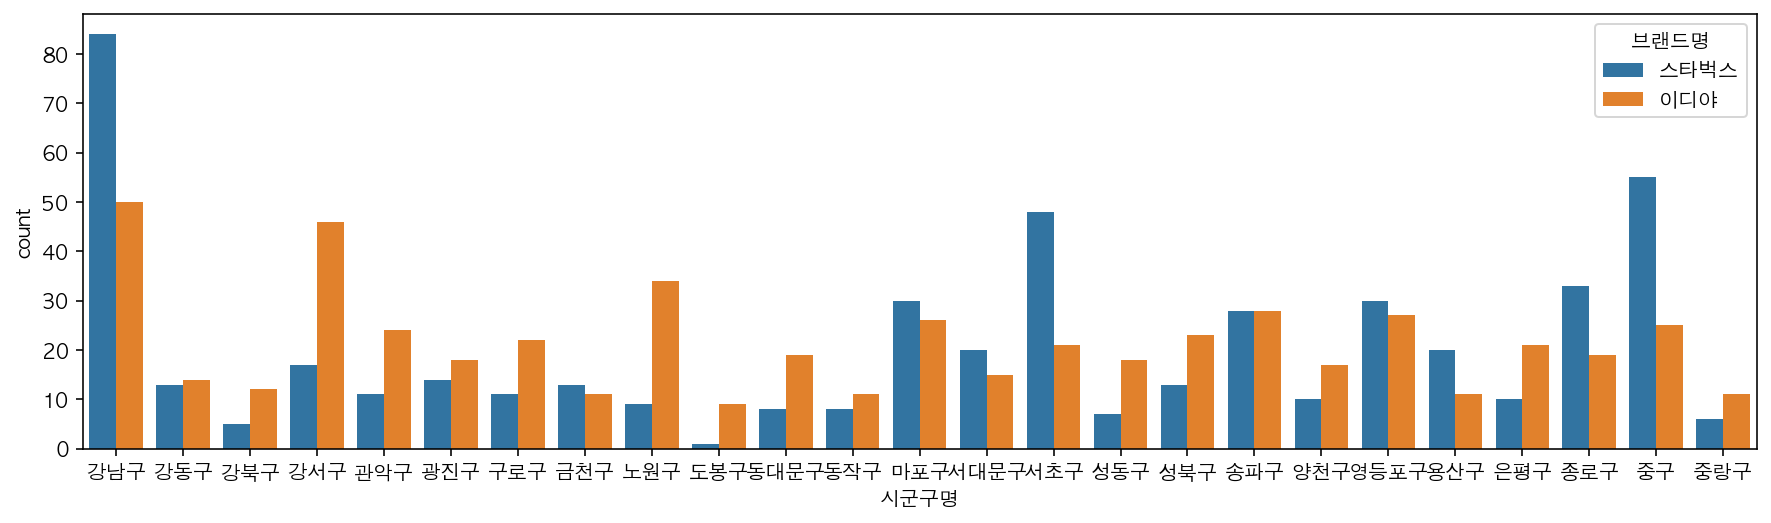

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명", order=gu_name_list)

In [ ]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함

lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat, long

(37.5429213982126, 126.9887885123524)

### 스타벅스 이디야 카페 매장 전체 분포
* 스타벅스와 이디야 매장을 Marker와 CircleMarker로 지도에 표현

In [ ]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)
m

### choropleth 를 위한 GeoJSON 파일로드

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
  
    
* Choropleth-maps : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb#Choropleth-maps

In [ ]:
# 서울의 행정구역 경계를 GeoJSON으로 표현
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현
geo_path = 'data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [ ]:
geo_json["features"][0]['properties']["name"]

'강동구'

### 스타벅스 매장 분포

In [ ]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구함
# "브랜드명"컬럼으로 스타벅스만 가져옴

df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
2  강동구  스타벅스   13
4  강북구  스타벅스    5
6  강서구  스타벅스   17
8  관악구  스타벅스   11

In [ ]:
# geo_json 에서 구 이름 가져오기

geo_json["features"][0]['properties']['name']

'강동구'

In [ ]:
# df_cafe_starbucks 로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YlGn'을 사용함

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m

### 이디야 매장 분포

In [ ]:
# 이디야의 매장 수를 구함
# "브랜드명"컬럼으로 이디야만 가져옴
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

구 브랜드명  매장수
1  강남구  이디야   50
3  강동구  이디야   14
5  강북구  이디야   12
7  강서구  이디야   46
9  관악구  이디야   24

In [ ]:

m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)


for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)

m

### 매장수 크기를 반영해 CircleMaker 그리기
* Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [ ]:
# df_vs 라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만듦
# 그리고 ["스타벅스", "이디야"] 로 컬럼명을 변경해주고 
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수비교" 컬럼에 담아줌
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명  스타벅스  이디야  매장수비교
구                     
강남구     84   50   True
강동구     13   14  False
강북구      5   12  False
강서구     17   46  False
관악구     11   24  False

In [ ]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명  스타벅스  이디야  매장수비교
구                     
강남구     84   50    1.0
강동구     13   14    0.0
강북구      5   12    0.0
강서구     17   46    0.0
관악구     11   24    0.0

In [ ]:
# 구를 컬럼명으로 사용하기 위해 reset_index 
# 데이터 프레임을 df_vs 에 저장
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명    구  스타벅스  이디야  매장수비교
0     강남구    84   50    1.0
1     강동구    13   14    0.0
2     강북구     5   12    0.0
3     강서구    17   46    0.0
4     관악구    11   24    0.0

### Choropleth 로 매장수의 많고 적음에 따라 표현하기

In [ ]:
# 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'BuGn'을 사용합니다.
# CircleMarker의 radius 지정시 int 타입일 때 다음과 같은 타입오류가 나서 
# float type 으로 변경이 필요합니다.
# TypeError: Object of type 'int64' is not JSON serializable


m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m

In [ ]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

시군구명          경도         위도
0  강남구  127.046129  37.505744
1  강동구  127.135417  37.540316
2  강북구  127.022897  37.631146
3  강서구  126.837883  37.555966
4  관악구  126.935210  37.482054

In [ ]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

구  스타벅스  이디야  매장수비교 시군구명          경도         위도
0  강남구    84   50    1.0  강남구  127.046129  37.505744
1  강동구    13   14    0.0  강동구  127.135417  37.540316
2  강북구     5   12    0.0  강북구  127.022897  37.631146
3  강서구    17   46    0.0  강서구  126.837883  37.555966
4  관악구    11   24    0.0  관악구  126.935210  37.482054

In [ ]:
# 구별로 CircleMarker를 표현하기 위해서는 각 구의 위경도 값을 구해야함
# 구별 위도와 경도를 가져와 평균 값을 구해서 사용
# 특정 구의 위경도의 평균을 구함

for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    print(df_vs.loc[i, "구"], sub_lat, sub_long)

강남구 37.50574379723647 127.04612924851477
강동구 37.54031612892801 127.13541705768304
강북구 37.63114579912596 127.02289728220342
강서구 37.555966339807725 126.8378831992901
관악구 37.482054429288624 126.93521011850088
광진구 37.54376971811047 127.08329747837426
구로구 37.494060747742985 126.87745596750014
금천구 37.469286927652114 126.8921962213389
노원구 37.6423933051354 127.06717137772726
도봉구 37.66576544822702 127.04047354226732
동대문구 37.580700635471146 127.05492813212528
동작구 37.49570035386574 126.94890217041826
마포구 37.55548154197544 126.92300493503947
서대문구 37.566284229288875 126.93762476470604
서초구 37.49301091104672 127.01402160112261
성동구 37.55457943854072 127.03635911128876
성북구 37.59886024576222 127.02565170180024
송파구 37.50117991460961 127.1141353230951
양천구 37.52891847594384 126.86196683493064
영등포구 37.520781009585264 126.91390000535677
용산구 37.53468952777027 126.98251254628539
은평구 37.61406806596294 126.92041650466946
종로구 37.57615434804085 126.98723628325011
중구 37.56289726978085 126.98657335073601
중랑구 37.5960

### 신문기사와 유사하게 매장수에 따라 원의 크기를 다르게 그리기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Colormaps.ipynb

In [ ]:

    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        print(cafe)

스타벅스
이디야


In [ ]:
df_vs.head(1)

구  스타벅스  이디야  매장수비교 시군구명          경도         위도
0  강남구    84   50    1.0  강남구  127.046129  37.505744

In [ ]:
np.sqrt(50)

7.0710678118654755

In [ ]:
# 아래의 for문을 활용해서  스타벅스, 이디야로 매장수를 반영해 그리도록 합니다.
# choropleth의 색상은 fill_color = 'BuGn'을 사용합니다.
# CircleMarker 의 radius 크기를 구해서 원의 크기를 다르게 표현해 봅니다.
# 또, 경도에 특정 숫자를 더해 두 개의 원이 겹치지 않게 그려봅니다.


m = folium.Map([lat, long], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)


for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        gu = df_vs.loc[i, "구"]
        tooltip = f"{gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color = "blue"
            sub_long = sub_long + 0.01
        else:
            color = "green"
            
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)
        
m

In [ ]:
m.save("04-coffee-store-choropleth.html")

* 카토그램
    * [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
    * [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)